In [2]:
import numpy as np
from gradvi.priors import Ash
from gradvi.inference import  LinearRegression

In [3]:
n = 100
p = 200
pcausal = 20
s2 = 1.4
np.random.seed(100)

X = np.random.normal(0, 1, size = n * p).reshape(n, p)
b = np.zeros(p)
b[:pcausal] = np.random.normal(0, 1, size = pcausal)
err = np.random.normal(0, np.sqrt(s2), size = n)
y = np.dot(X, b) + err

In [4]:
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

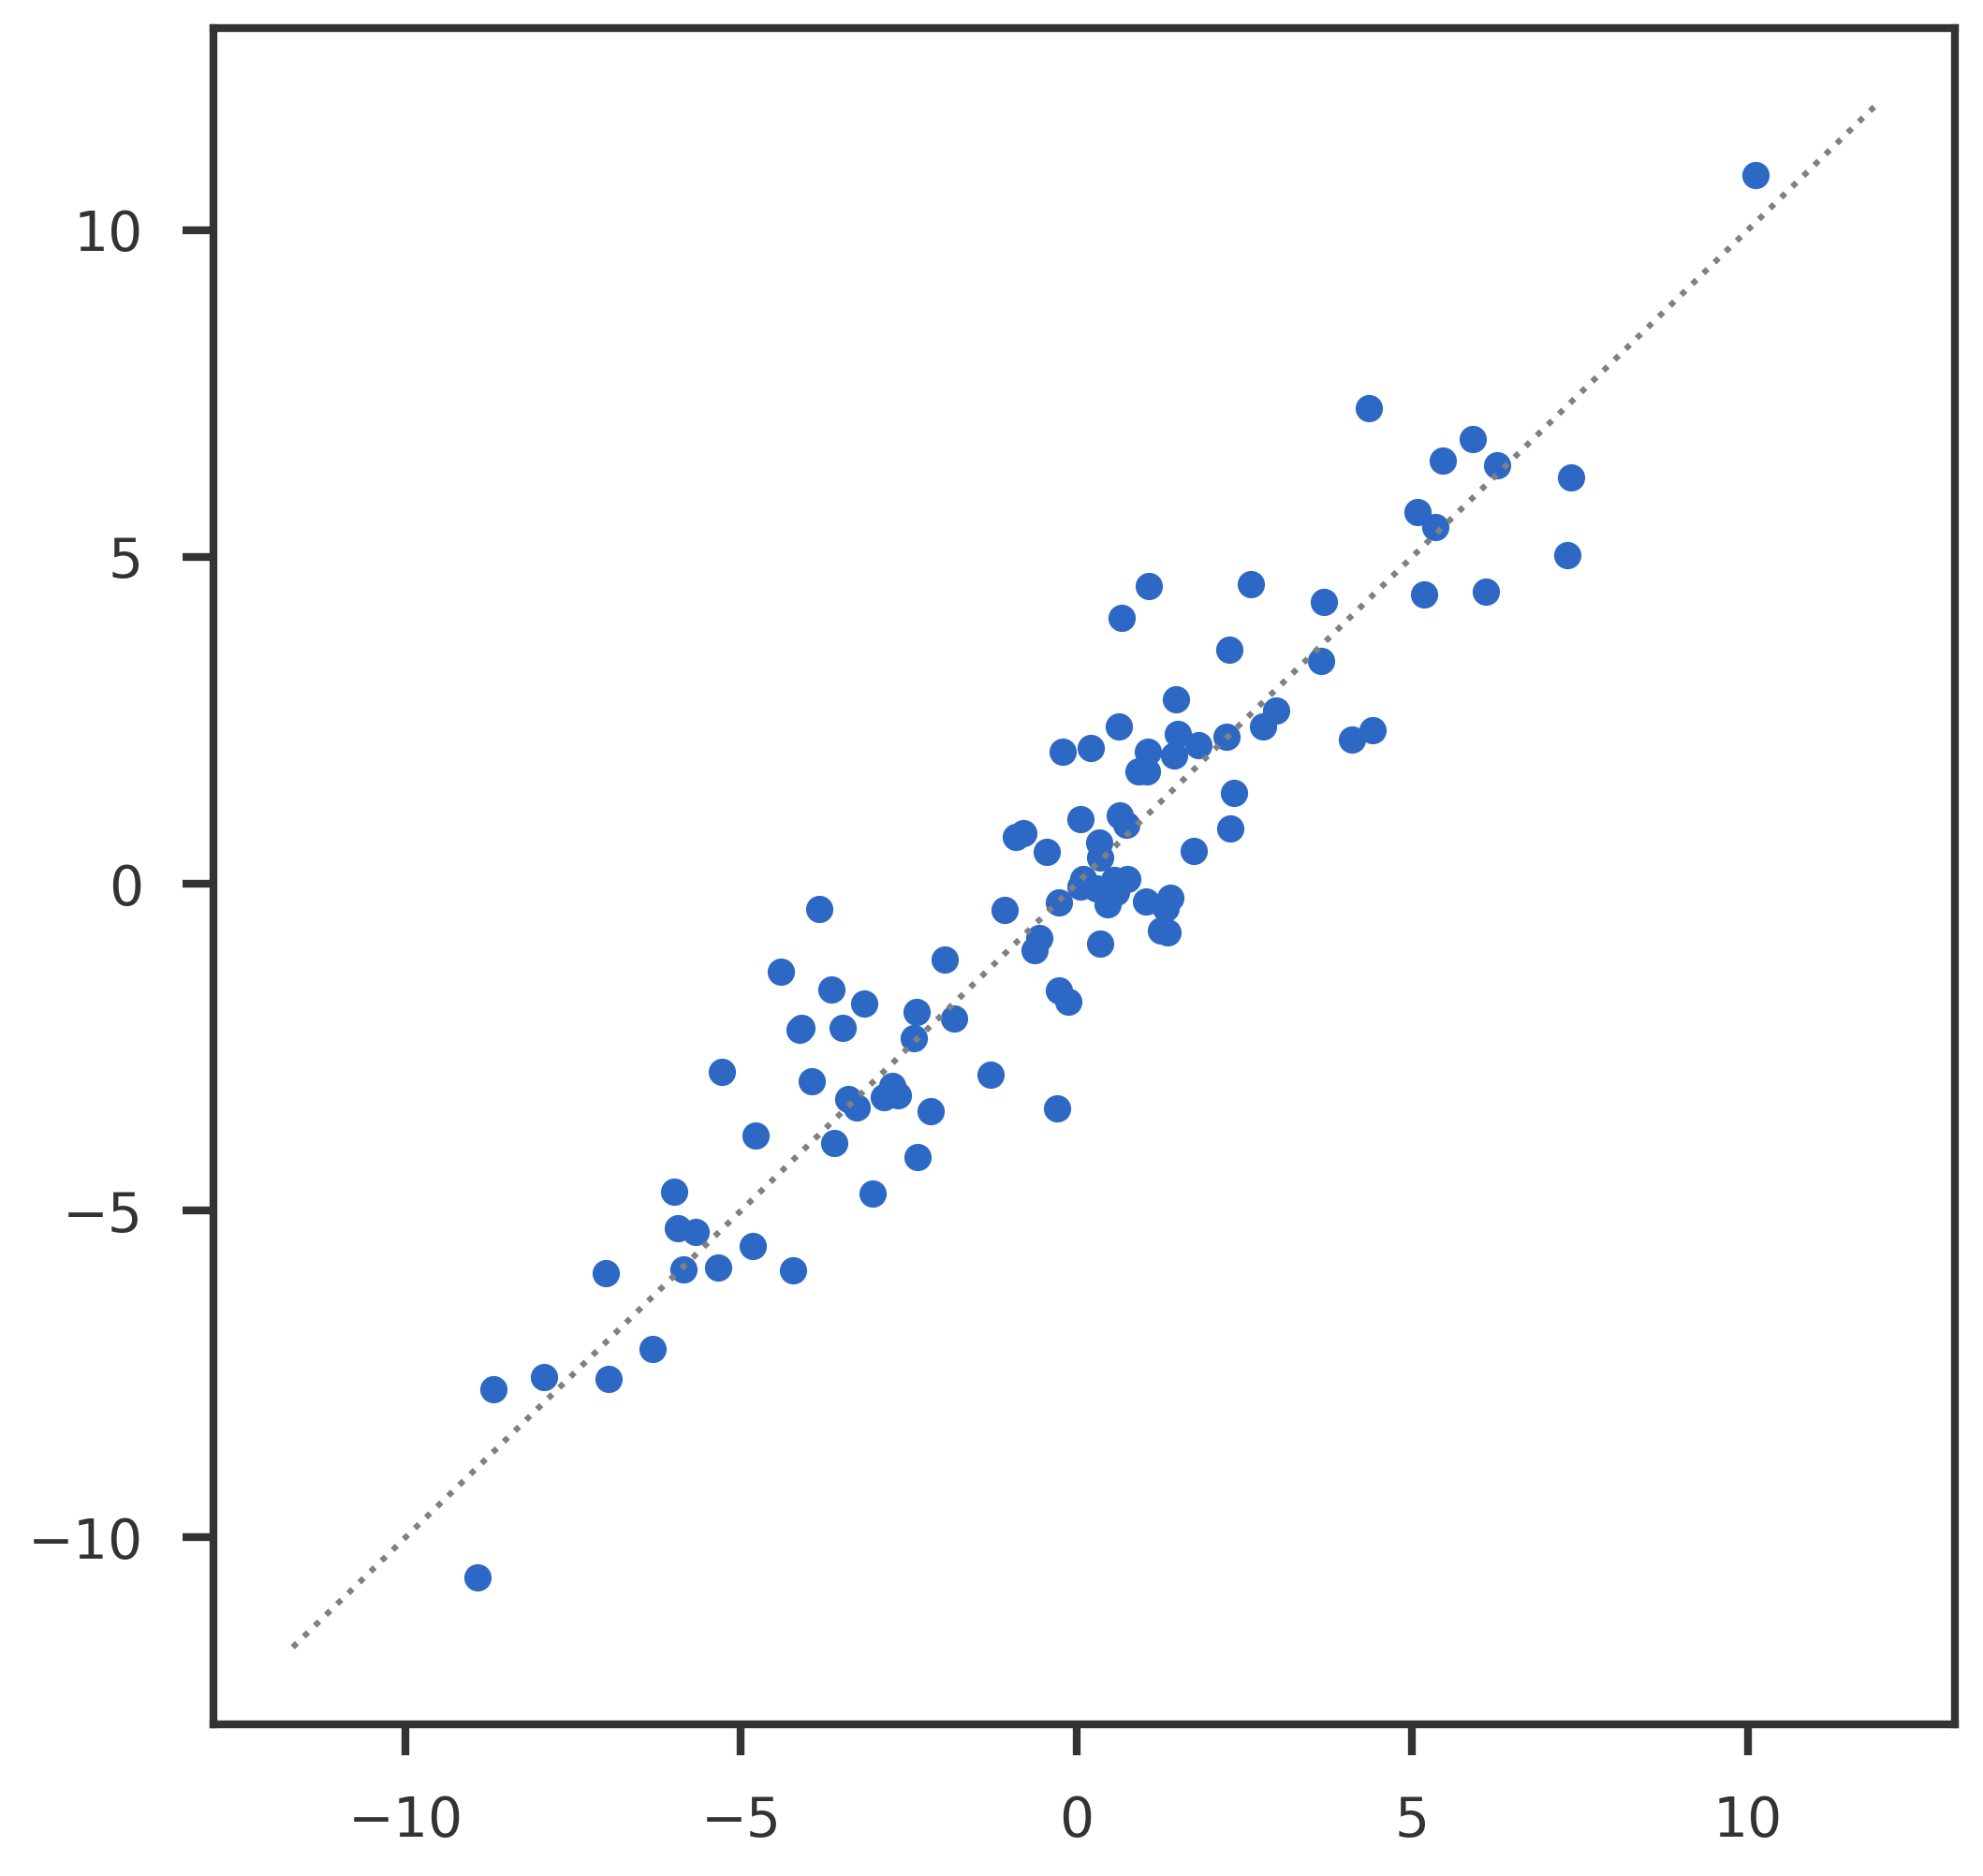

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.dot(X, b), y)
mpl_utils.plot_diag(ax1)
plt.show()

In [6]:
k = 10
sk = (np.power(2.0, np.arange(k) / k) - 1)
print(sk)

[0.         0.07177346 0.14869835 0.23114441 0.31950791 0.41421356
 0.51571657 0.62450479 0.74110113 0.86606598]


In [7]:
prior = Ash(sk, scaled = True)
gvlin = LinearRegression(debug = False, display_progress = False)
gvlin.fit(X, y, prior)

2022-04-22 11:20:21,787 | gradvi.inference.linear_regression | INFO | Terminated at iteration 283.


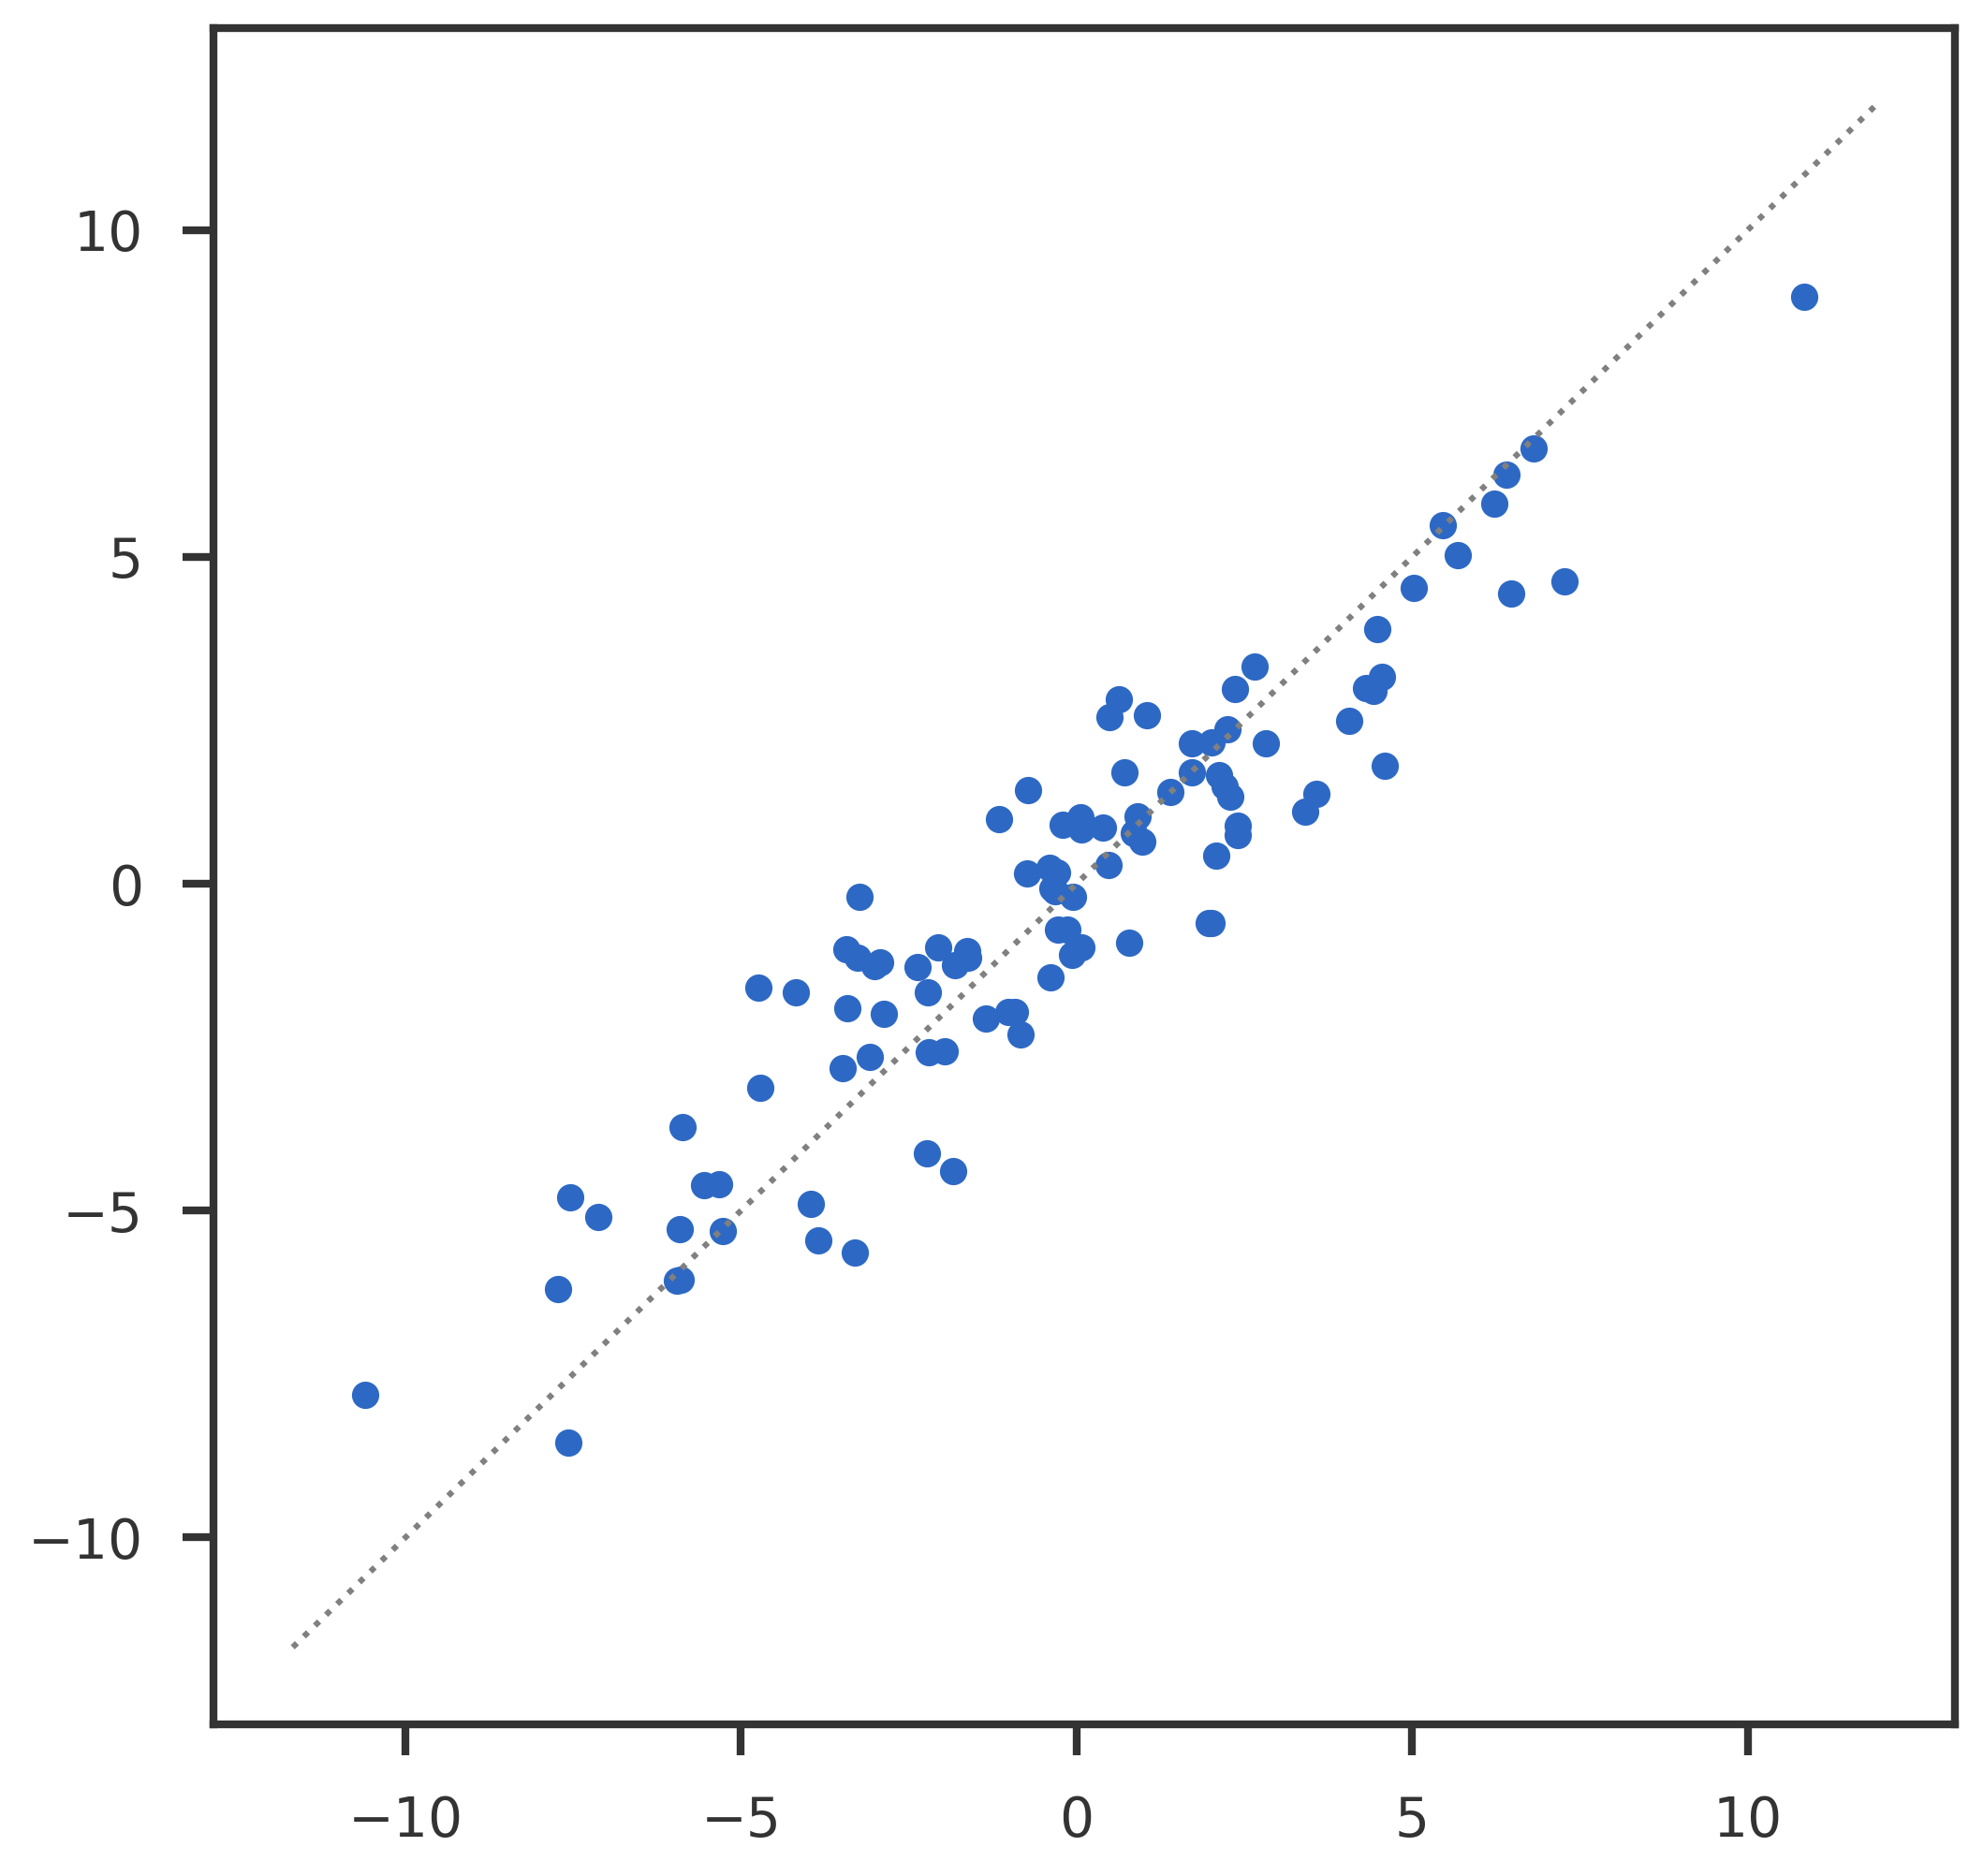

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y, np.dot(X, gvlin.coef))
mpl_utils.plot_diag(ax1)
plt.show()

In [9]:
from gradvi.tests import toy_data
Xscale = toy_data.center_and_scale(X)

In [10]:
from sklearn import preprocessing
Xscale2 = preprocessing.scale(X, axis = 0, with_mean = True)

In [13]:
np.allclose(Xscale, Xscale2)

True

In [14]:
prior = Ash(sk, scaled = True)
gvlin2 = LinearRegression(debug = False, display_progress = False, obj = "direct", invert_method = "fssi-cubic")
gvlin2.fit(Xscale, y, prior)

2022-04-22 11:21:37,970 | gradvi.inference.linear_regression | INFO | Terminated at iteration 746.


In [15]:
%%debug

prior = Ash(sk, scaled = True)
gvlin2 = LinearRegression(
            debug = False, display_progress = False, 
            obj = "direct", invert_method = "fssi-cubic",
            invert_options = {'ngrid': 500}
            )
gvlin2.fit(Xscale, y, prior)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(3)<module>()

ipdb> c
2022-04-22 11:21:51,571 | gradvi.inference.linear_regression | INFO | Terminated at iteration 746.


In [16]:
gvlin2.residual_var

2.814911156119332

In [17]:
gvlin.residual_var

2.922149576874318

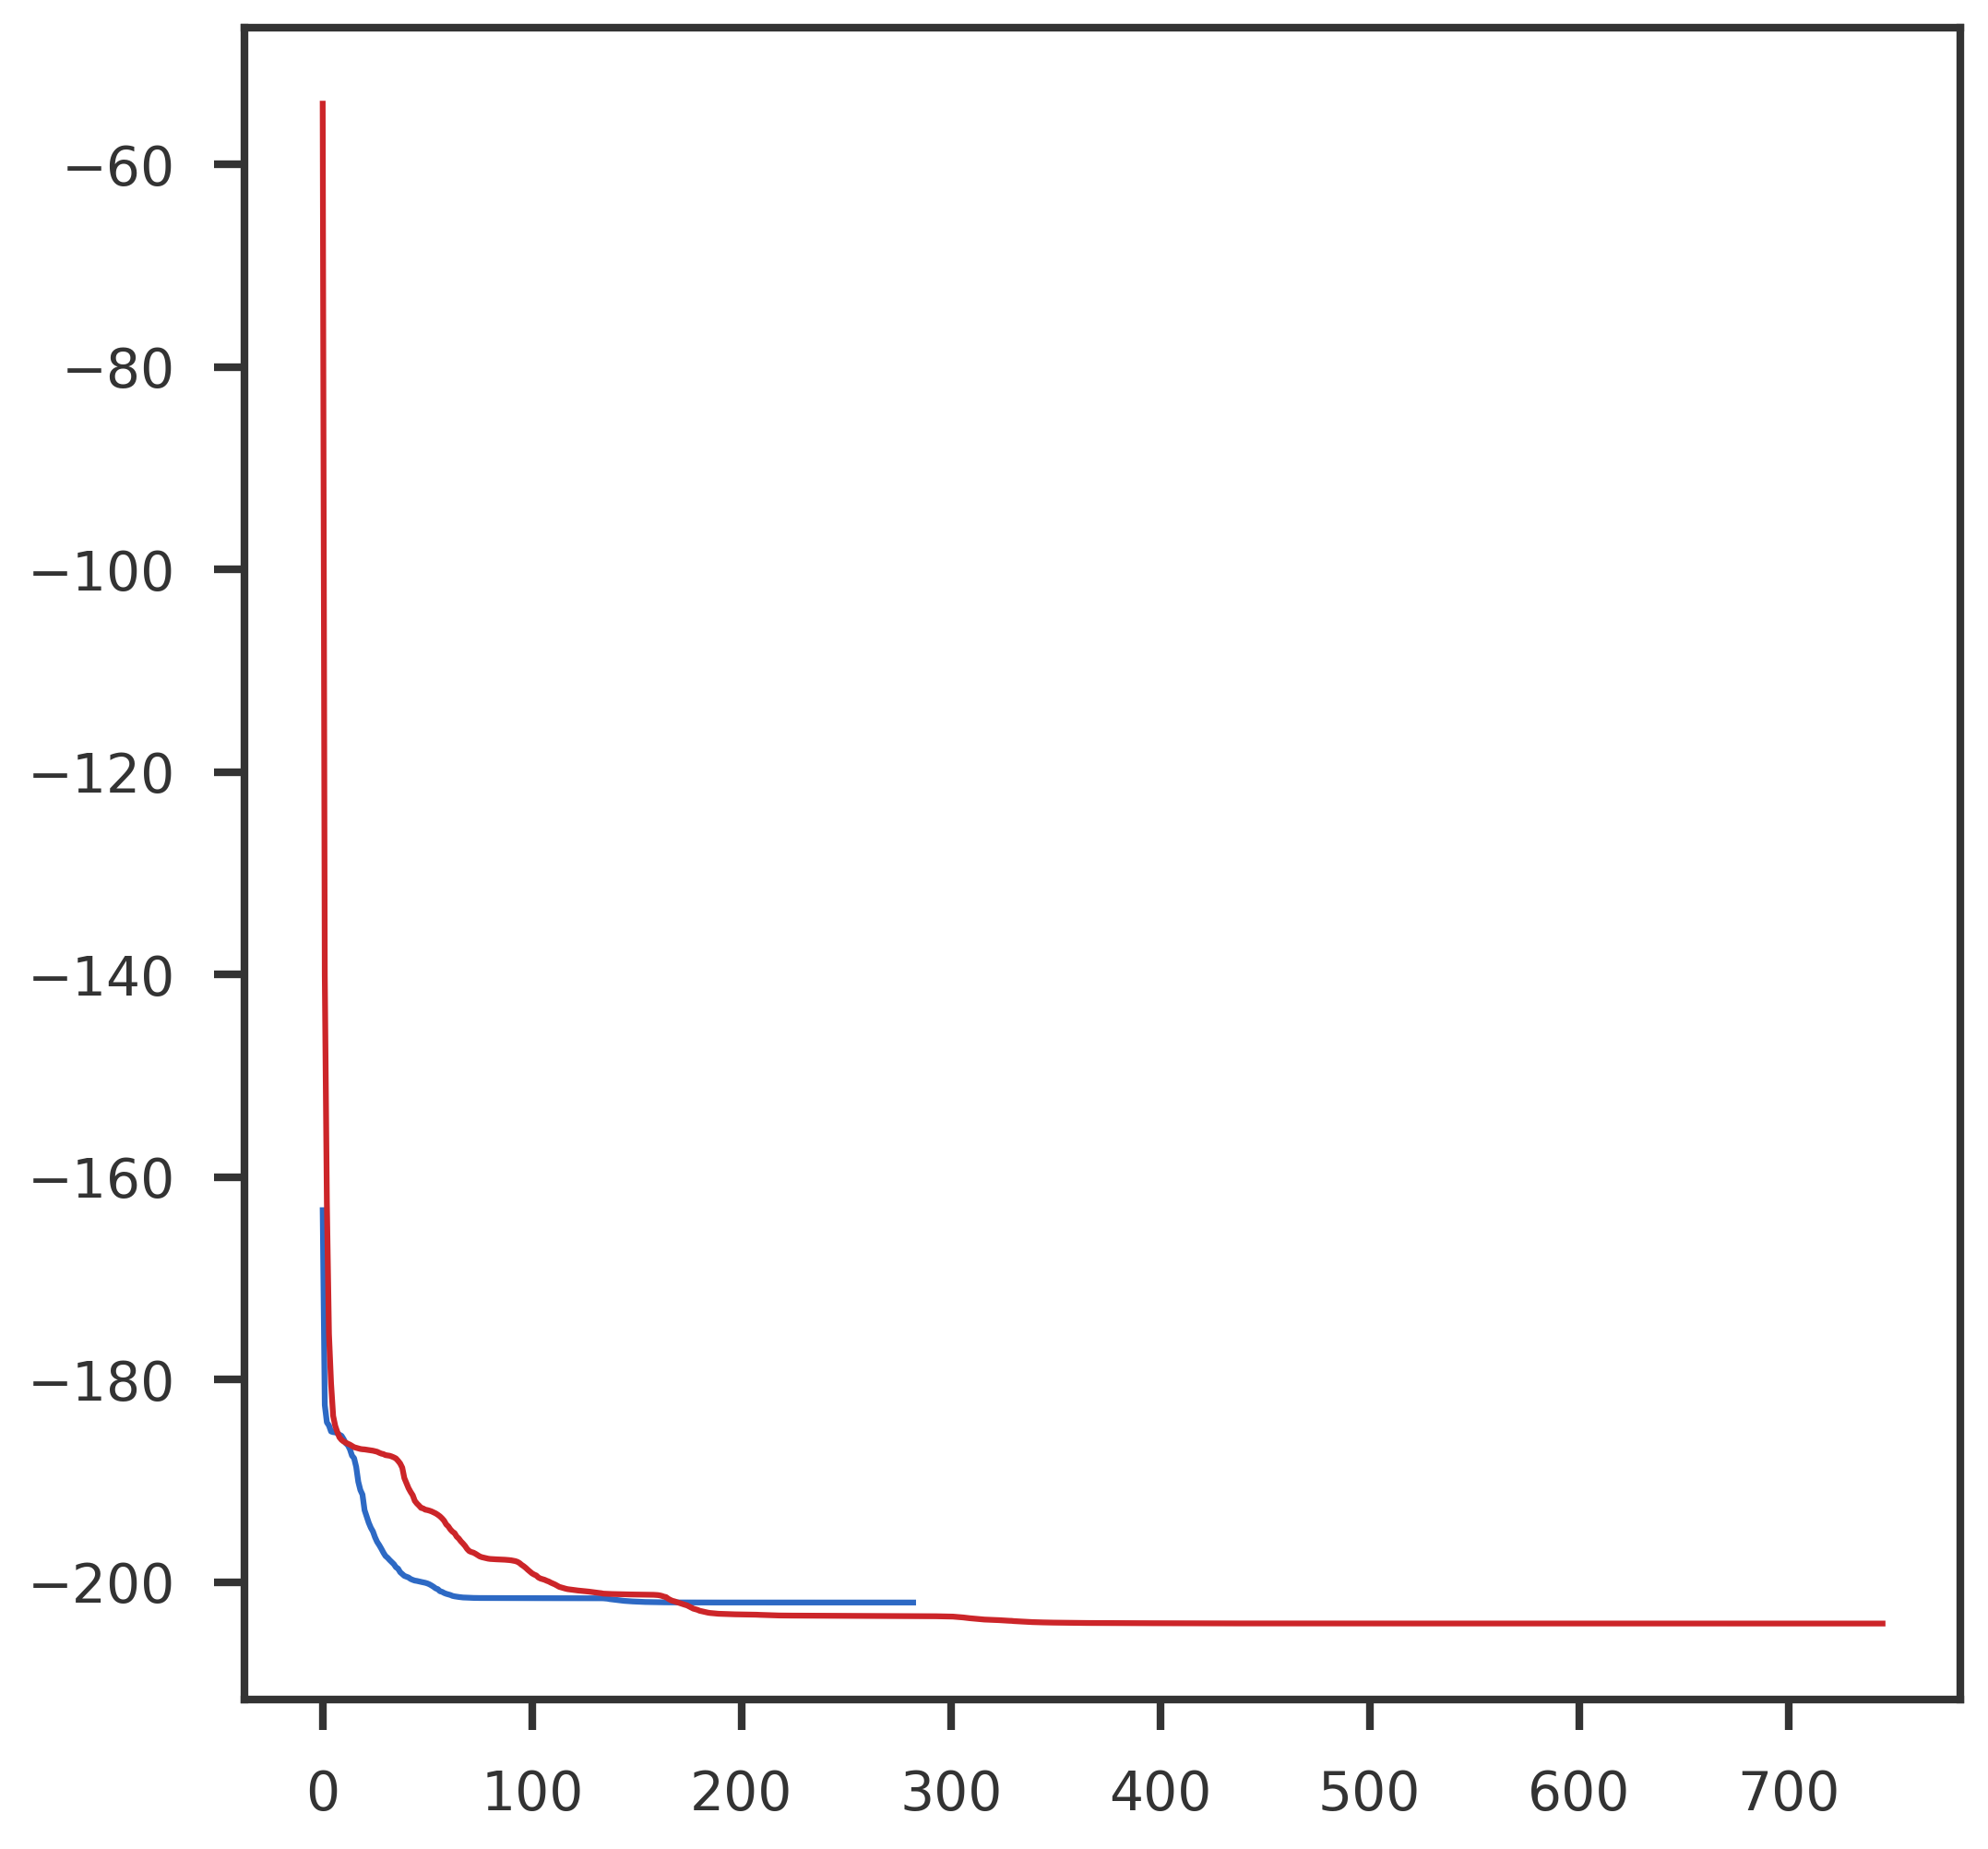

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(gvlin.niter), gvlin.obj_path)
ax1.plot(np.arange(gvlin2.niter), gvlin2.obj_path)
#mpl_utils.plot_diag(ax1)
plt.show()

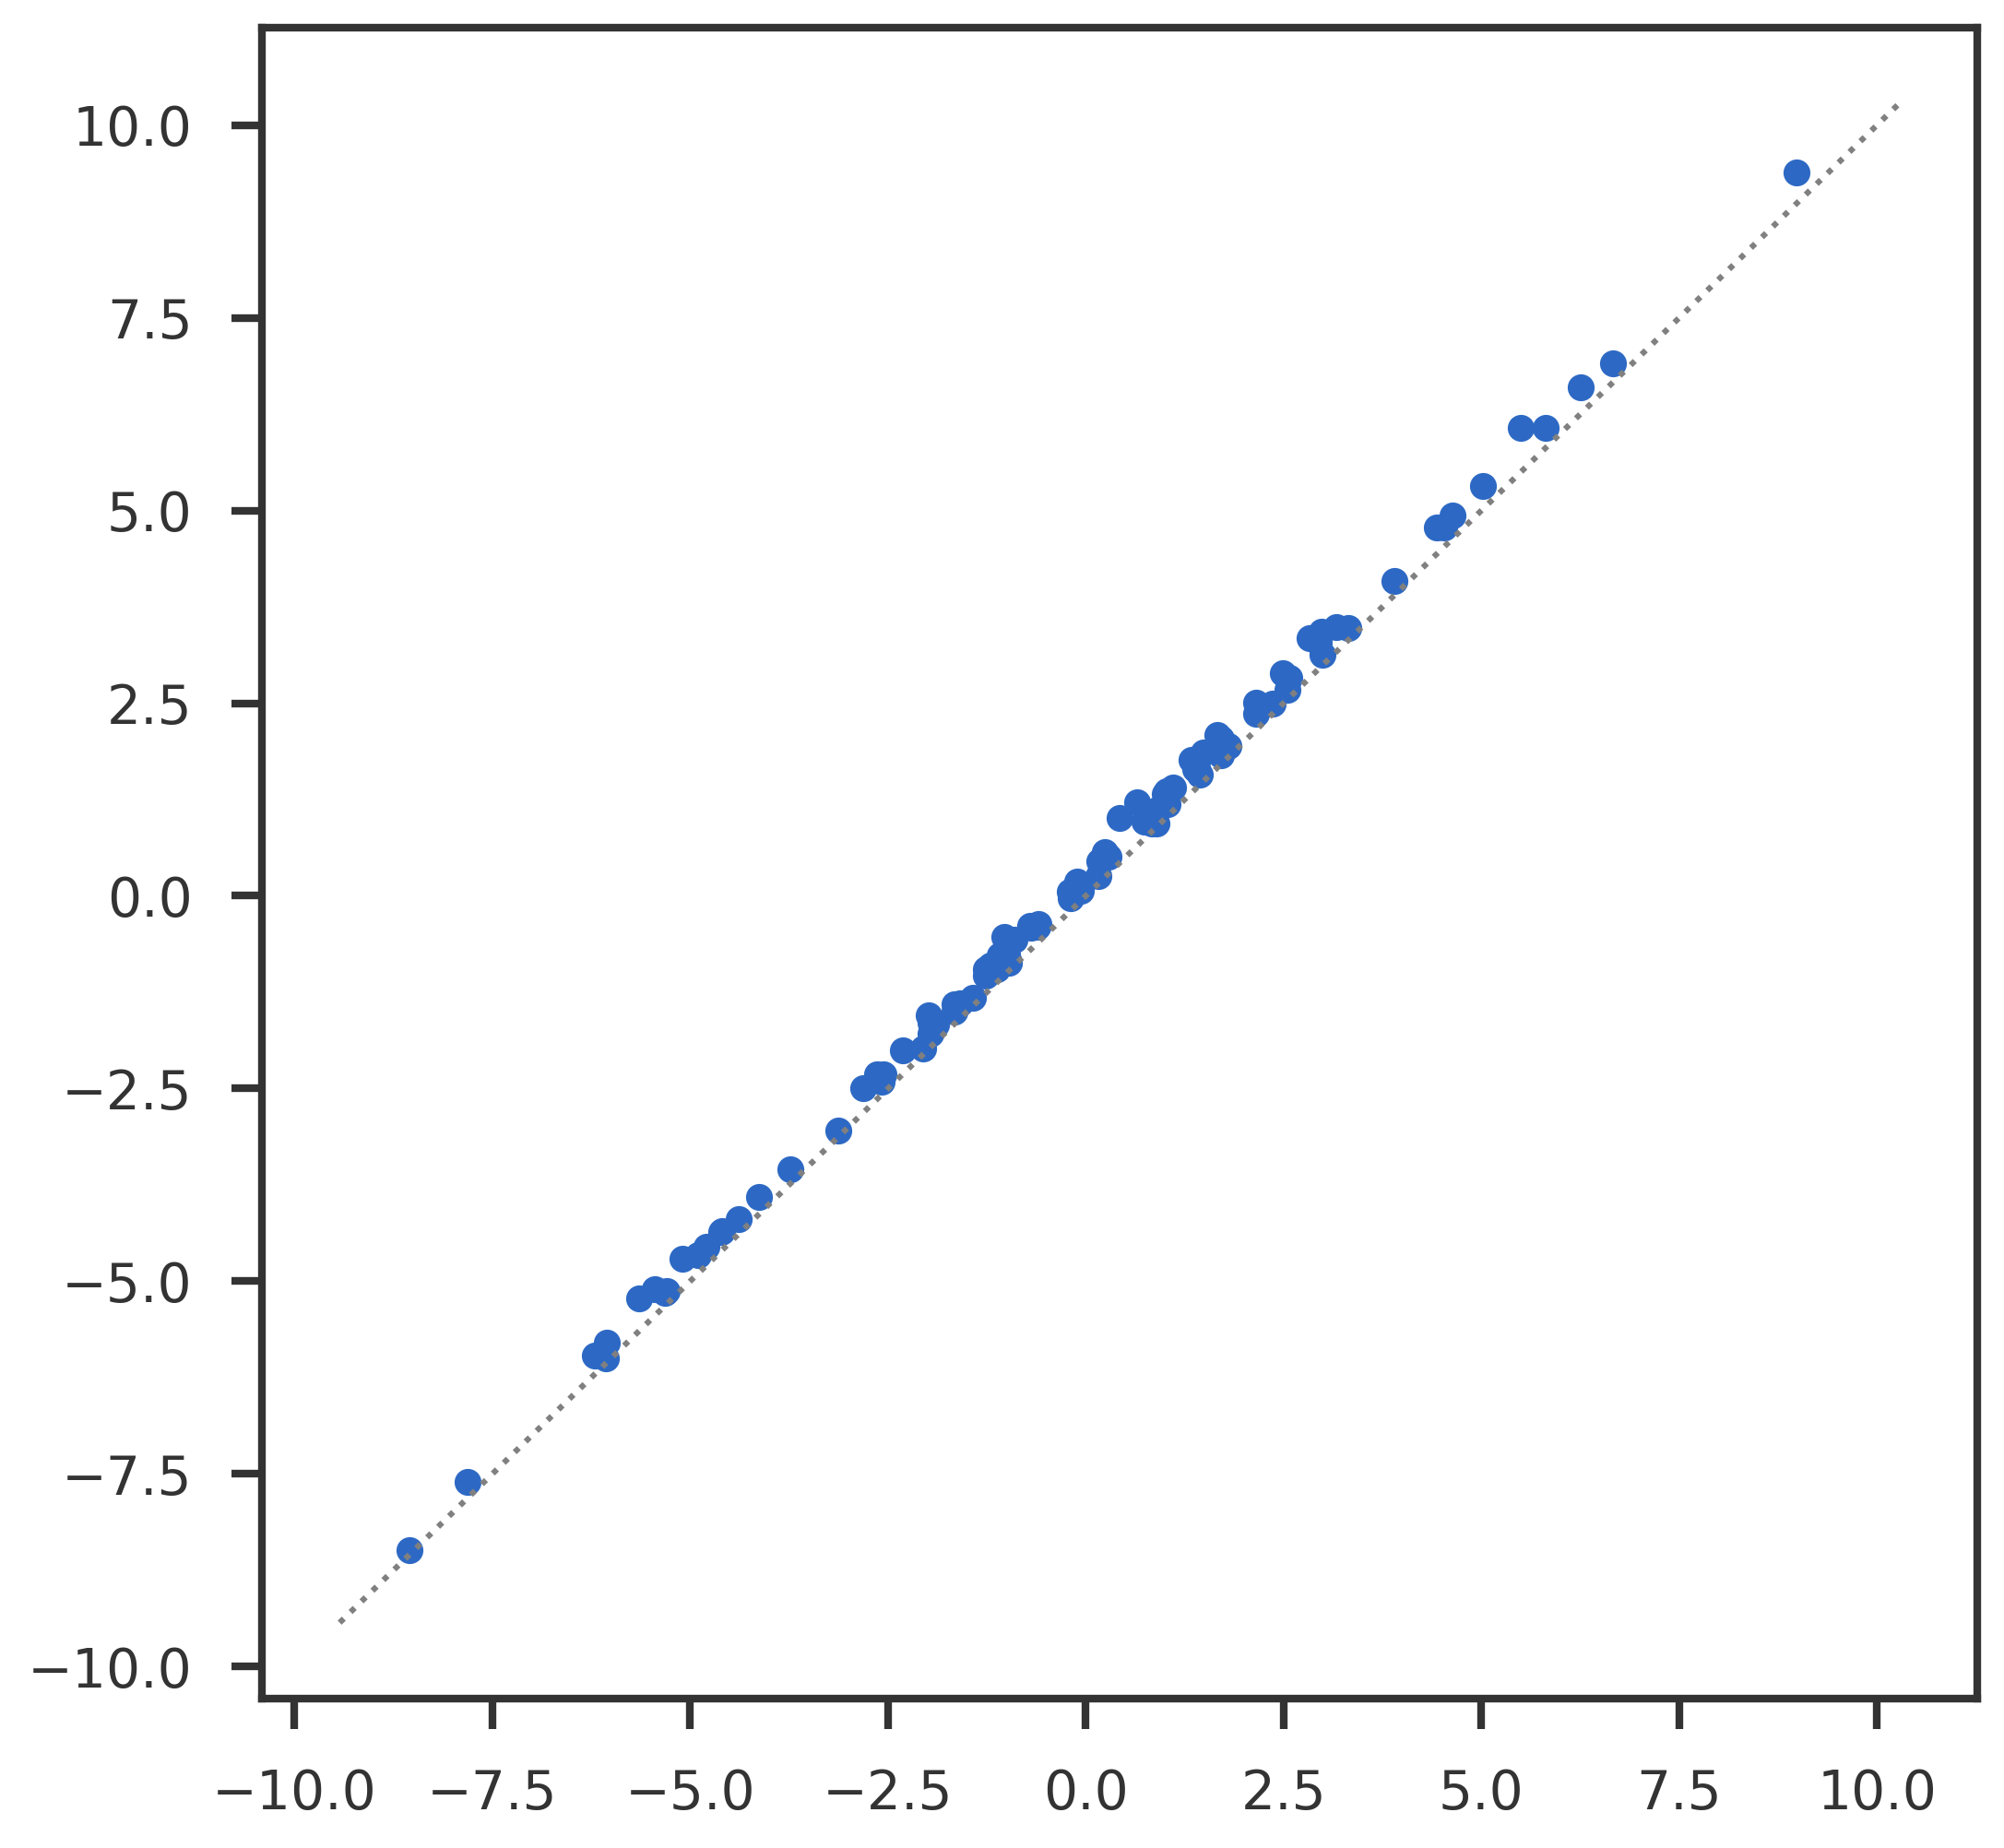

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.dot(X, gvlin.coef), np.dot(Xscale, gvlin2.coef))
mpl_utils.plot_diag(ax1)
plt.show()